# Tutorial 4: Covid 19 Prediction using Artificial Neural Networks

Dataset: [Covid 19 Chest X-ray dataset](https://www.kaggle.com/tawsifurrahman/covid19-radiography-database)


A team of researchers from Qatar University, Doha, Qatar, and the University of Dhaka, Bangladesh along with their collaborators from Pakistan and Malaysia in collaboration with medical doctors have created a database of chest X-ray images for COVID-19 positive cases along with Normal and Viral Pneumonia images. This COVID-19, normal, and other lung infection dataset is released in stages. In the first release, we have released 219 COVID-19, 1341 normal, and 1345 viral pneumonia chest X-ray (CXR) images. In the first update, we have increased the COVID-19 class to 1200 CXR images. In the 2nd update, we have increased the database to 3616 COVID-19 positive cases along with 10,192 Normal, 6012 Lung Opacity (Non-COVID lung infection), and 1345 Viral Pneumonia images. We will continue to update this database as soon as we have new x-ray images for COVID-19 pneumonia patients.



**1. Mount the Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Move to the place where data resides**

In [5]:
%cd /content/drive/MyDrive/ML_LAB/

/content/drive/MyDrive/ML_LAB


In [ ]:
!ls

covid_dataset.zip  Image_Classification_using_ANN.ipynb
diabetes.csv	   Neural_Network_Classification.ipynb


**3. Unziping the dataset**

In [6]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7921.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7922.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7923.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7924.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7925.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7926.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7927.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7928.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7929.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-793.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7930.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7931.png  
  inflating: COVID-19_Radiography_Dataset/Normal/masks/Normal-7932.png  
 

**4. Install split folder python package**

https://pypi.org/project/split-folders/

In [7]:
!pip install split_folders

**5. Splitting the data in training, testing and validation set**

In [8]:
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/ML_LAB/", output="split", seed=1337, ratio=(.8, .1, .1), group_prefix=None)

ValueError: ignored

**6. Loading the dataset with normalization in batches**

The directory must be set to the path where your ‘n’ classes of folders are present.
The target_size is the size of your input images, every image will be resized to this size.
color_mode: if the image is either black and white or grayscale set “grayscale” or if the image has three color channels, set “rgb”.
batch_size: No. of images to be yielded from the generator per batch.
class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.
shuffle: Set True if you want to shuffle the order of the image that is being yielded, else set False.
seed: Random seed for applying random image augmentation and shuffling the order of the image.


The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize training and validation data in the range of 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Read the training sample and set the batch size 
train_generator = train_datagen.flow_from_directory(
        'split/train/',
        target_size=(128, 128),
        batch_size=8,
        seed=100,
        class_mode='categorical')

# Read Validation data from directory and define target size with batch size
validation_generator = validation_datagen.flow_from_directory(
        'split/val/',
        target_size=(128, 128),
        batch_size=8,
        class_mode='categorical',
        seed=1000,
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        'split/test/',
        target_size=(128, 128),
        batch_size=8,
        seed=500,
        class_mode='categorical',
        shuffle=False)

Found 120 images belonging to 3 classes.
Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


**7. Model Building**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(128, 128,3))
x = layers.Flatten()(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(3, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 32)                1572896   
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,575,203
Trainable params: 1,575,203
Non-trainable params: 0
_________________________________________________________________


In [ ]:
! pip install tensorflow

     |████████████████████████████████| 462 kB 5.0 MB/s 


**8. Model Compilation and Training**

In [ ]:
from tensorflow.keras.optimizers import Adam

adam = Adam(learning_rate=0.0001)
# We are going to use accuracy metrics and cross entropy loss as performance parameters
model.compile(adam, loss='categorical_crossentropy', metrics=['acc'])
# Train the model 
history = model.fit(train_generator, 
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/100
15/15 [==============================] - 3s 41ms/step - loss: 1.2026 - acc: 0.3750 - val_loss: 1.0798 - val_acc: 0.3333
Epoch 2/100
15/15 [==============================] - 0s 32ms/step - loss: 0.7964 - acc: 0.6417 - val_loss: 0.6724 - val_acc: 0.6667
Epoch 3/100
15/15 [==============================] - 0s 30ms/step - loss: 0.6634 - acc: 0.7000 - val_loss: 0.5862 - val_acc: 0.8000
Epoch 4/100
15/15 [==============================] - 0s 30ms/step - loss: 0.6013 - acc: 0.7667 - val_loss: 0.6914 - val_acc: 0.6667
Epoch 5/100
15/15 [==============================] - 0s 28ms/step - loss: 0.5565 - acc: 0.7417 - val_loss: 0.4563 - val_acc: 0.8667
Epoch 6/100
15/15 [==============================] - 0s 29ms/step - loss: 0.4902 - acc: 0.8083 - val_loss: 0.6879 - val_acc: 0.6000
Epoch 7/100
15/15 [==============================] - 0s 29ms/step - loss: 0.5412 - acc: 0.7833 - val_loss: 0.5254 - val_acc: 0.7333
Epoch 8/100
15/15 [==============================] - 0s 29ms/step - loss: 0.

**9. Model saving**

In [ ]:
model.save('covid_classification.h5')

**10. Model loading**

In [ ]:
from tensorflow.keras import models
model = models.load_model('covid_classification.h5')

**11. Model weights saving**

In [ ]:
model.save_weights('covid_classification_weights.h5')

**12. Model weights loading**

In [ ]:
model.load_weights('covid_classification_weights.h5')

**13. Plotting accuracy and loss graph for training and validation dataset**

In [ ]:
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

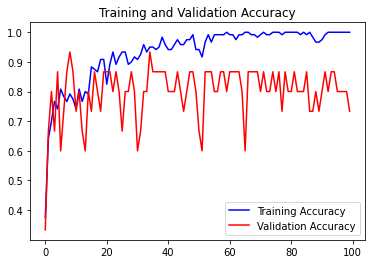

<Figure size 432x288 with 0 Axes>

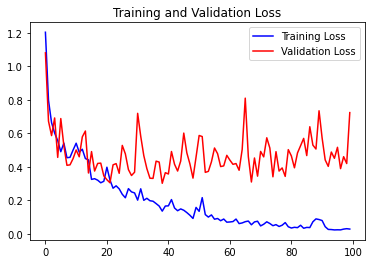

In [ ]:
import matplotlib.pyplot as plt
epochs = range(len(train_acc)) 
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**14. Evaluate model performance on test dataset**

In [ ]:
test_output= model.evaluate(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose=1)
print(test_output)
print(model.metrics_names)

1/1 [==============================] - 0s 28ms/step - loss: 0.9602 - acc: 0.8000
[0.9601898193359375, 0.800000011920929]
['loss', 'acc']


References:

1. https://pypi.org/project/split-folders/
2. https://keras.io/